In [24]:
import numpy as np
import pydicom as dicom
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import six

from myshow import myshow
from radiomics import featureextractor, getTestCase

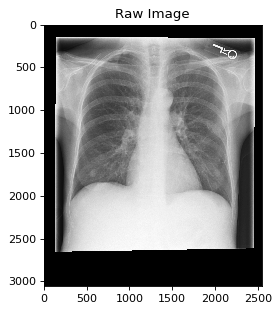

In [15]:
# specify your image path
image_path = '02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'
ds = dicom.dcmread(image_path)
img = sitk.GetImageFromArray(ds.pixel_array)
img_255 = sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8)
myshow(img, title="Raw Image")

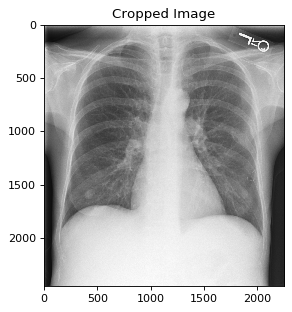

In [16]:
crop = ds.pixel_array[150:2600,150:2400]
img_crop = sitk.GetImageFromArray(crop)
img_crop_255 = sitk.Cast(sitk.RescaleIntensity(img2), sitk.sitkUInt8)
myshow(img_crop, title="Cropped Image")

## Segmentation 1: Thresholding
### Basic Thresholding

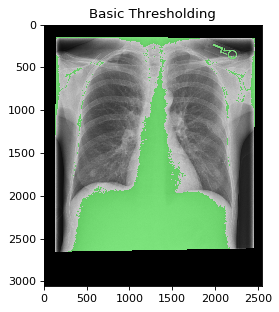

In [34]:
seg_basic = img_255>200
myshow(sitk.LabelOverlay(img_255, seg_basic), "Basic Thresholding")

In [23]:
extractor = featureextractor.RadiomicsFeatureExtractor('Params.yaml')
result = extractor.execute(img_255, seg_basic)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input


In [25]:
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0
	 diagnostics_Versions_Numpy : 1.17.2
	 diagnostics_Versions_SimpleITK : 1.2.4
	 diagnostics_Versions_PyWavelet : 1.0.0
	 diagnostics_Versions_Python : 3.6.2
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : aab0fb5136a87bf629286a0392742cfdc1a45865
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (1.0, 1.0)
	 diagnostics_Image-original_Size : (2544, 3056)
	 diagnostics_Image-original_Mean : 115.99405875440416
	 diagnostics_Image-ori

### Binary Thresholding

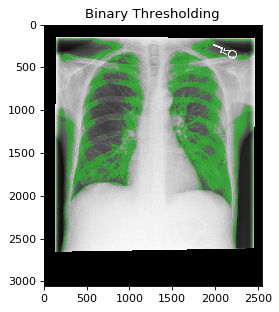

In [37]:
seg_binary = sitk.BinaryThreshold(img_255, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
myshow(sitk.LabelOverlay(img_255, seg_binary), "Binary Thresholding")

### Otsu Thresholding

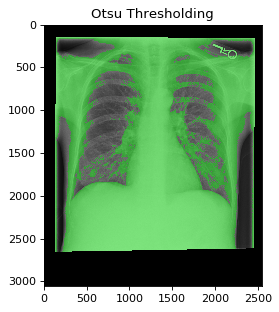

In [38]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg_otsu = otsu_filter.Execute(img)
myshow(sitk.LabelOverlay(img_255, seg_otsu), "Otsu Thresholding")